<a href="https://colab.research.google.com/github/kajal1301/car_damage_detection.github.io/blob/main/car_damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install tensorflow-gpu==1.15.0
# !pip install keras==2.2.5
# !pip install h5py==2.10.0

     |████████████████████████████████| 411.5 MB 5.2 kB/s 
     |████████████████████████████████| 3.8 MB 38.6 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 503 kB 39.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f373433b38a5ce6c7e0cdb49a9728d433bf9f324836de6c1aaf376b7b4056179
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succe

In [ ]:
import tensorflow
import keras
print("tensorflow version:", tensorflow.__version__)
print("keras version:",keras.__version__)

tensorflow version: 1.15.0
keras version: 2.2.5


Using TensorFlow backend.


In [ ]:
import json
from IPython.display import Image, display, clear_output
import shutil
import os
import numpy as np
from collections import Counter
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.data_utils import get_file
from keras.models import Sequential, load_model,Model
import h5py
import skimage

import pickle as pk

# Detecting Car

In [ ]:
model1 = VGG16(weights = 'imagenet')
with open('/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/models/vgg16_cat_list.pk', 'rb') as f:
    categ_count = pk.load(f)
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'






553467904/553467096 [==============================] - 6s 0us/step








In [ ]:
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',CLASS_INDEX_PATH,cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results


In [ ]:

def prepare_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x


In [ ]:
  def is_a_car(image,categ_list):
      img= prepare_image(image)

      out = model1.predict(img)
      preds = get_predictions(out, top=5)
      print("Identifying...")
      for pred in preds[0]:
          if pred[0:2] in categ_list:
              print(pred[0:2])
              return True
      return False

In [ ]:
is_a_car('/content/drive/MyDrive/car damage detection/img/1.jpg',categ_count)

40960/35363 [==================================] - 0s 1us/step
Identifying...
('n03770679', 'minivan')


True

# Detect Damage in Car

In [ ]:
model2 = load_model('/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/models/ft_model.h5')


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:

def is_damaged(image_path,model2):
    # urllib.request.urlretrieve(image_path, 'save.jpg')
    img = load_img(image_path, target_size=(256,256))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)/255
    pred = model2.predict(x)
    #print("Car is Damaged")
    print(pred)
    if(pred[0][0]<=0.5):
      print("Car is Damaged")
      return True
    else:
      print("Car is not Damaged")
      return False

In [ ]:
is_damaged('/content/drive/MyDrive/car damage detection/img/1.jpg',model2)

[[0.]]
Car is Damaged


True

# Detecting Damage in Car using mask-rcnn

In [ ]:
!pip install mrcnn
!pip install imgaug

     |████████████████████████████████| 51 kB 249 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54930 sha256=3d71d9b9ebc48da4e40c61ebdb6ea368642f02d5073e9c369207614c23268f79
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [ ]:
import keras.engine as KE
KE.Layer

keras.engine.base_layer.Layer

In [ ]:
import mrcnn.model as modellib

import os
import sys
os.chdir('/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN')
#ROOT DIRECTORY:
# Root directory 
ROOT_DIR= os.path.abspath("")
sys.path.append(ROOT_DIR) 

from mrcnn.config import Config
from mrcnn import utils
#import mrcnn.model as modellib
from mrcnn import visualize

%matplotlib inline

#directory to save logs and trained model
# To find local version of the library
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

COCO_MODEL_PATH = os.path.join(ROOT_DIR,'mask_rcnn_coco.h5')
#DOWnload coco trained weights

if not os.path.exists(COCO_MODEL_PATH):
  utils.download_trained_weights(COCO_MODEL_PATH)

#Directory of images to run detection on
IMAGE_DIR= os.path.join(ROOT_DIR,'images')

In [ ]:
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library

import keras.engine as KE

# from mrcnn import utils
# from mrcnn import visualize
from mrcnn.visualize import display_images
# from keras.layers import Layer
# from mrcnn import model
# # import mrcnn.model as modellib
from mrcnn.model import log
import cv2
import custom,custom_1
import imgaug,h5py,IPython
# KE.Layer
%matplotlib inline

In [ ]:
# Root directory of the project
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # To find local version of the library
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
custom_WEIGHTS_PATH = "/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/models/mask_rcnn_scratch_0003.h5"  # TODO: update this path for best performing iteration weights
config = custom.CustomConfig()
# custom_DIR = '/content/drive/MyDrive/car-damage-detection-using-CNN/custom/'
# custom_DIR

In [ ]:
config = custom.CustomConfig()
# ROOT_DIR = 'C:/Users/Sourish/Mask_RCNN'
# CUSTOM_DIR = os.path.join(ROOT_DIR + "/custom/")
# print(CUSTOM_DIR)
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)


# Create model in inference mode
# import tensorflow as tf
with tensorflow.device(DEVICE):
  model= modellib.MaskRCNN(mode='inference', model_dir= MODEL_DIR, config= config)



Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:





# load the last best model you trained
# weights_path = model.find_last()[1]
custom_WEIGHTS_PATH = '/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/models/mask_rcnn_scratch_0004.h5'
# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)    
model.keras_model._make_predict_function()

Loading weights  /content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/models/mask_rcnn_scratch_0004.h5


# Deploying model


In [ ]:
#deploy model using flask:
!pip install flask-ngrok

In [ ]:
import zipfile
from skimage import data,io
from flask import render_template, request, Flask, url_for,flash, redirect,send_file
from flask_ngrok import run_with_ngrok
from shutil import make_archive
from tqdm import tqdm
from werkzeug.utils import secure_filename
import warnings
app= Flask(__name__)
app= Flask(__name__,static_folder='/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static',template_folder='/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/templates')
run_with_ngrok(app)

app.secret_key = "secret key"
UPLOAD_PATH= '/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/uploads'
PRED_PATH= '/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/prediction'
app.config['UPLOAD_FOLDER'] = UPLOAD_PATH
app.config['PRED_FOLDER'] = PRED_PATH
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024
Allowed_extensions= ['jpg','jpeg','png','zip']
# zipped_extensions=['zip']

In [ ]:

def allowed_file(filename):
	return '.' in filename and filename.rsplit('.', 1)[1].lower() in Allowed_extensions
@app.route('/')
def upload_form():
	return render_template('base.html')


In [ ]:
from skimage import io
@app.route('/', methods=['POST'])
def upload_image():
	fileupload=False
	zipupload=False
	if 'file' not in request.files:
		flash('No file part')
		return redirect(request.url)
	file = request.files['file']
	if file.filename == '':
		flash('No image selected for uploading')
		return redirect(request.url)
	print(file.filename)
	f= file.filename
	
	namefolder= f.split('.')[-2]
	print("NAME OF FOLDER:",namefolder)
	ext= f.split('.')[-1].lower()	
	class_names=['BG','scratch']
	if ext in Allowed_extensions:
		filename = secure_filename(file.filename)
		file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
		file_path= UPLOAD_PATH+'/'+filename
		
		# fileupload=True

		if ext in ['jpg','jpeg','png']:
			fileupload=True
			print("YOU HAVE UPLOADED AN IMAGE")
			print('upload_image filename: ' + filename)
			flash('Image successfully uploaded and displayed below')
			#is a car
			# class_names=['BG','scratch']
			print("FILE PATH IS:",file_path)
			filename = file_path.split('/')[-1]
			print("Filename is:",filename)
			
			# folder = file_path.split('/')[-2]
			is_car= is_a_car(file_path,categ_count)
			if is_car:
				print("Car Found")
				
				damaged_car= is_damaged(file_path,model2)
				if damaged_car:
					print("CAR IS DAMAGED")
					print("PREDICTING DAMAGE......")
					image = io.imread(file_path)  
					io.imshow(image)
					plt.show()
			
					#rescaling image
					if image.ndim != 3:
						image = skimage.color.gray2rgb(image)
				# If has an alpha channel, remove it for consistency
					if image.shape[-1] == 4:
							image = image[..., :3]
					#print(img.shape)
					image, window, scale, padding, crop = utils.resize_image(image,
																																min_dim=config.IMAGE_MIN_DIM,
																																min_scale=config.IMAGE_MIN_SCALE,
																																max_dim=config.IMAGE_MAX_DIM,
																																mode=config.IMAGE_RESIZE_MODE)
					print(image.shape)
					
				
						#Run Damage detection
					print("Running damage detection")
					img_arr = np.array(image)
					results = model.detect([image], verbose=1)
					ax= get_ax(1)
					ax = plt.gca()
					r = results[0]
					visualize.display_instances(img_arr, r['rois'], r['masks'], r['class_ids'],class_names, r['scores'],ax=ax, title='Predictions')
					plt.savefig(PRED_PATH+'/'+filename,bbox_inches='tight', pad_inches=-0.5,orientation= 'landscape')
					plt.show()
				
					return render_template('damage.html',fileupload= fileupload, is_car= is_car, damaged_car= damaged_car, filename=filename)
				return render_template('damage.html',fileupload= fileupload,is_car= is_car, damaged_car= damaged_car, filename=filename) 
			return render_template('damage.html',fileupload= fileupload,is_car= is_car, damaged_car= damaged_car,filename= filename)
	
		if ext== 'zip':
			car,dam=0,0
			zipupload=True
			print("Zip file is uploaded")
			zip_ref = zipfile.ZipFile(os.path.join(UPLOAD_PATH, filename), 'r')
			zip_ref.extractall(UPLOAD_PATH)
			zip_ref.close()
			print("EXtracted zipped file")
			i=0
			img_dir= os.path.join(UPLOAD_PATH +'/'+ namefolder)
			print("image directory:",img_dir)
			prediction_dir = os.path.join(PRED_PATH+'/'+namefolder)
			if not prediction_dir:
				os.mkdir(prediction_dir, mode=0o777)
			print("PREDICTION DIR:", prediction_dir)
	 		# image_paths=[]
			for image_path in tqdm(os.listdir(img_dir)):
					path= os.path.join(img_dir+'/'+image_path)
					print("IMAGE PATH:",path)
					img = io.imread(path)
					plt.imshow(img)
		 			# If  there is a car:
					if is_a_car(path, categ_count):
						car+=1
						print("Car Found...")
						print("Detecting Damage....")
						# If car is damaged:
						if is_damaged(path,model2):
							dam+=1
							print("Damage Detected.....")
							print("Locating Damage....")
			 				# Locating  damage in car:
							# If grayscale. Convert to RGB for consistency.
							if img.ndim != 3:
								img = skimage.color.gray2rgb(img)
							# If has an alpha channel, remove it for consistency
							if img.shape[-1] == 4:
									img = img[..., :3]
							#print(img.shape)
							img, window, scale, padding, crop = utils.resize_image(img,
                                                              min_dim=config.IMAGE_MIN_DIM,
                                                              min_scale=config.IMAGE_MIN_SCALE,
                                                              max_dim=config.IMAGE_MAX_DIM,
                                                              mode=config.IMAGE_RESIZE_MODE)
							print(img.shape)
							#RUN DAMAGE DETECTION:
							img_arr = np.array(img)
							results = model.detect([img], verbose=1)
							ax= get_ax(1)
							ax = plt.gca()
							r = results[0]
							visualize.display_instances(img_arr, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],ax=ax, title='Predictions')
							loc= PRED_PATH+'/'+str(i)
							plt.savefig(loc ,bbox_inches='tight', pad_inches=-0.5,orientation= 'landscape') 
							i+=1
							plt.show()
							# plt.imshow(loc)
						else:
							print("NO Damage Detected!!!!!!")
					else:
						print("No Car Found!!!!!!")
			# zipping the predicted image folder
			print("NUMBER OF CARS FOUND=",car)
			flash("NUMBER OF CARS FOUND=",car)
			print("NUMBER OF DAMAGED CARS:",dam)
			flash("NUMBER OF DAMAGED CARS:",dam)

			make_archive('damage_pred', 'zip', root_dir= PRED_PATH)
			print("FOLDER SUCCESFULLY ARCHIEVED.........")

			return render_template('damage.html',zipupload= zipupload, car= car, dam= dam,result= 'damage_pred.zip')

				# res= predict_damage(image_path)
				# print(res)
		else:
			flash('Allowed image types are -> png, jpg, jpeg, gif and zipped extensions')
			return redirect(request.url)
	
@app.route('/display/<filename>')
def display_image(filename):
	print('display_image filename: ' + filename)
	return redirect(url_for('static', filename='uploads/' + filename), code=301)
@app.route('/display/<imagename>')
def predict_image(imagename):
	print('display_predicted filename: ' + imagename)
	return redirect(url_for('static', filename='prediction/' + imagename), code=301)
@app.route('/download/<filename>')
def download_file(filename):
	path= '/content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/'+filename
	return send_file(path, as_attachment= True)

# Output

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7f3f-35-225-94-45.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Oct/2021 08:36:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2021 08:36:23] "GET /static/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:23] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:23] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:23] "GET /assets/js/util.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:24] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:24] "GET /assets/js/main.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:24] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:24] "GET /static/js/bootstrap.bundle.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:24] "GET /bgimg2.jpeg HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:24] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:24] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2

0c.jpeg
NAME OF FOLDER: 0c
YOU HAVE UPLOADED AN IMAGE
upload_image filename: 0c.jpeg
FILE PATH IS: /content/drive/MyDrive/car-damage-detection-using-mrcnn/car-damage-detection-using-CNN.zip (Unzipped Files)/car-damage-detection-using-CNN/static/uploads/0c.jpeg
Filename is: 0c.jpeg
Identifying...
('n03770679', 'minivan')
Car Found
[[0.]]
Car is Damaged
CAR IS DAMAGED
PREDICTING DAMAGE......


127.0.0.1 - - [18/Oct/2021 08:36:30] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -


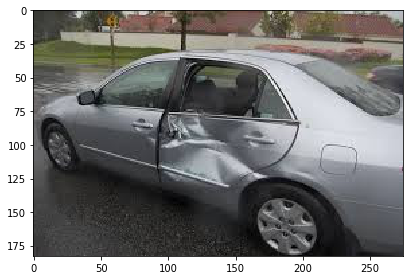

(1024, 1024, 3)
Running damage detection
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


127.0.0.1 - - [18/Oct/2021 08:36:32] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:33] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:35] "GET /assets/js/util.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:37] "GET /assets/js/main.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:38] "GET /static/js/bootstrap.bundle.min.js HTTP/1.1" 404 -



*** No instances to display *** 



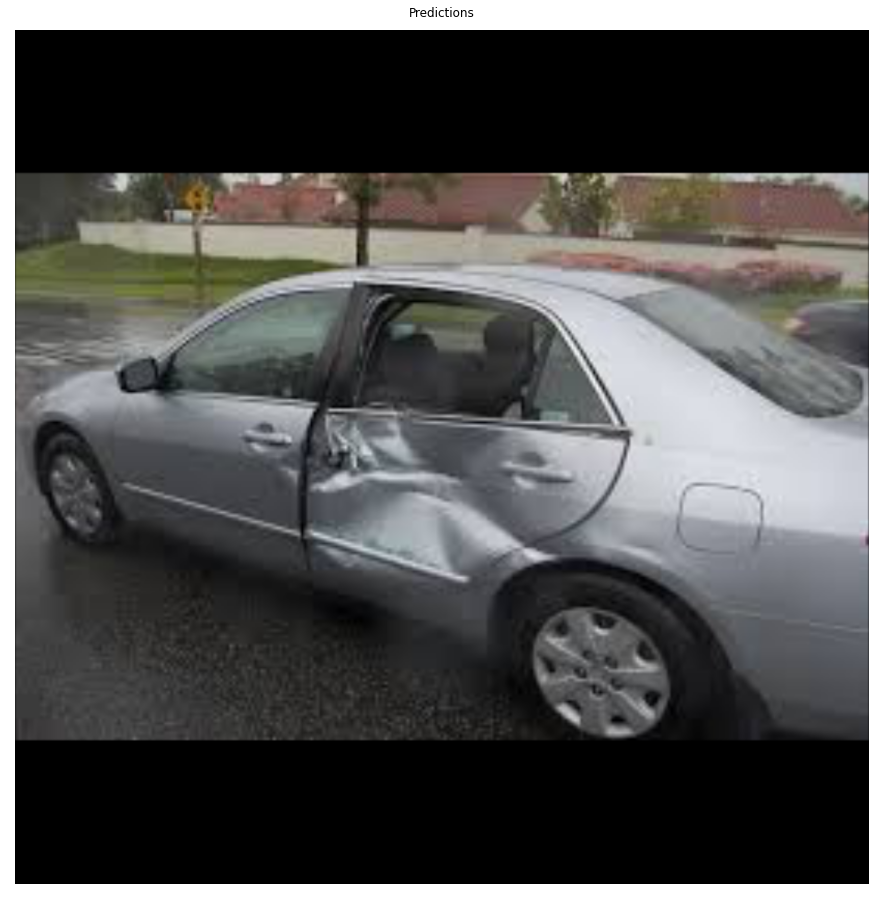

127.0.0.1 - - [18/Oct/2021 08:36:46] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /static/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /assets/js/util.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /assets/js/main.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /logo.png HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /static/js/bootstrap.bundle.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /display/0c.jpeg HTTP/1.1" 301 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /bgimg2.jpeg HTTP/1.1" 404 -


display_image filename: 0c.jpeg


127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:47] "GET /static/uploads/0c.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2021 08:36:48] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:48] "GET /assets/js/util.js HTTP/1.1" 404 -
127.0.0.1 - - [18/Oct/2021 08:36:48] "GET /assets/js/main.js HTTP/1.1" 404 -


In [ ]:

if __name__=="__main__":                                           
  
    app.run()